In [69]:
import pandas as pd
import numpy as np
import copy
import random
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

#  Import et mise en forme

In [70]:
data = pd.read_csv("biodeg.csv", sep=" ")
print(data)

      SpMax_L  J_Dz(e)    C%  SdssC  HyWi_B(m)    LOC   SM6_L  F03[C-O]  \
1       3.919   2.6909  31.4  0.000      3.106  2.550   9.002         0   
2       4.170   2.1144  30.8  0.000      2.461  1.393   8.723         1   
3       3.932   3.2512  26.7  0.000      3.279  2.585   9.110         0   
4       3.000   2.7098  20.0  0.000      2.100  0.918   6.594         0   
5       4.236   3.3944  29.4 -0.271      3.449  2.753   9.528         2   
...       ...      ...   ...    ...        ...    ...     ...       ...   
1051    5.431   2.8955  32.1  0.374      3.233  0.832  10.681         2   
1052    5.287   3.3732  35.3 -5.256      4.319  2.346  11.029        21   
1053    4.869   1.7670  44.4 -0.391      4.435  1.073  11.072         9   
1054    5.158   1.6914  56.1  0.000      4.902  0.257  11.817         0   
1055    5.076   2.6588  54.5  0.000      3.792  0.673  10.327         0   

         Me     Mi  ...  B01[C-Br]  B03[C-Cl]  SpMax_A  Psi_i_1d     SdO  \
1     0.960  1.142  ...

In [71]:
data.head()


,SpMax_L,J_Dz(e),C%,SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,...,B01[C-Br],B03[C-Cl],SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B(m),Psi_i_A,SM6_B(m),Y
1,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0,0.960,1.142,...,0,0,1.932,0.011,0.000,4.489,2.949,1.591,7.253,1
2,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,1,0.989,1.144,...,0,0,2.214,-0.204,0.000,1.542,3.315,1.967,7.257,1
3,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,0,1.009,1.152,...,0,0,1.942,-0.008,0.000,4.891,3.076,2.417,7.601,1
4,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,0,1.108,1.167,...,0,0,1.414,1.073,8.361,1.333,3.046,5.000,6.690,1
5,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,2,1.004,1.147,...,0,0,1.985,-0.002,10.348,5.588,3.351,2.405,8.003,1


In [72]:

#keysqual = ['F03[C-O]', 'B01[C-Br]', 'B03[C-Cl]']
keysqual = ['B01[C-Br]', 'B03[C-Cl]']

keysquant = []
for i in data.keys():
    if i not in keysqual and i != 'Y':
        keysquant.append(i)

print(data[keysqual])
print(data[keysquant])

      B01[C-Br]  B03[C-Cl]
1             0          0
2             0          0
3             0          0
4             0          0
5             0          0
...         ...        ...
1051          0          0
1052          0          0
1053          0          0
1054          0          1
1055          0          1

[1055 rows x 2 columns]
      SpMax_L  J_Dz(e)    C%  SdssC  HyWi_B(m)    LOC   SM6_L  F03[C-O]  \
1       3.919   2.6909  31.4  0.000      3.106  2.550   9.002         0   
2       4.170   2.1144  30.8  0.000      2.461  1.393   8.723         1   
3       3.932   3.2512  26.7  0.000      3.279  2.585   9.110         0   
4       3.000   2.7098  20.0  0.000      2.100  0.918   6.594         0   
5       4.236   3.3944  29.4 -0.271      3.449  2.753   9.528         2   
...       ...      ...   ...    ...        ...    ...     ...       ...   
1051    5.431   2.8955  32.1  0.374      3.233  0.832  10.681         2   
1052    5.287   3.3732  35.3 -5.256      4.319  2.3

# Analyse Unidimensionelle

In [73]:
data.describe()

,SpMax_L,J_Dz(e),C%,SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,...,B01[C-Br],B03[C-Cl],SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B(m),Psi_i_A,SM6_B(m),Y
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,37.055640,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,...,0.039810,0.147867,2.215641,-0.001206,8.780510,2.668344,3.918240,2.558417,8.629492,0.269194
std,0.546916,0.831308,9.144466,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,...,0.195606,0.355137,0.226131,0.158928,11.895889,2.096607,0.999602,0.642765,1.241986,0.443751
min,2.000000,0.803900,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,...,0.000000,0.000000,1.000000,-1.099000,0.000000,0.444000,2.267000,1.467000,4.917000,0.000000
25%,4.481000,2.502750,30.450000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,...,0.000000,0.000000,2.101000,-0.008000,0.000000,1.446500,3.487500,2.103000,7.991000,0.000000
50%,4.828000,3.046300,37.500000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,...,0.000000,0.000000,2.247000,0.000000,0.000000,2.052000,3.726000,2.458000,8.499000,0.000000
75%,5.125000,3.437650,43.400000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,...,0.000000,0.000000,2.358000,0.005000,12.465000,3.146000,3.987000,2.870500,9.020500,1.000000
max,6.496000,9.177500,60.700000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,...,1.000000,1.000000,2.859000,1.073000,71.167000,17.537000,10.695000,5.825000,14.700000,1.000000


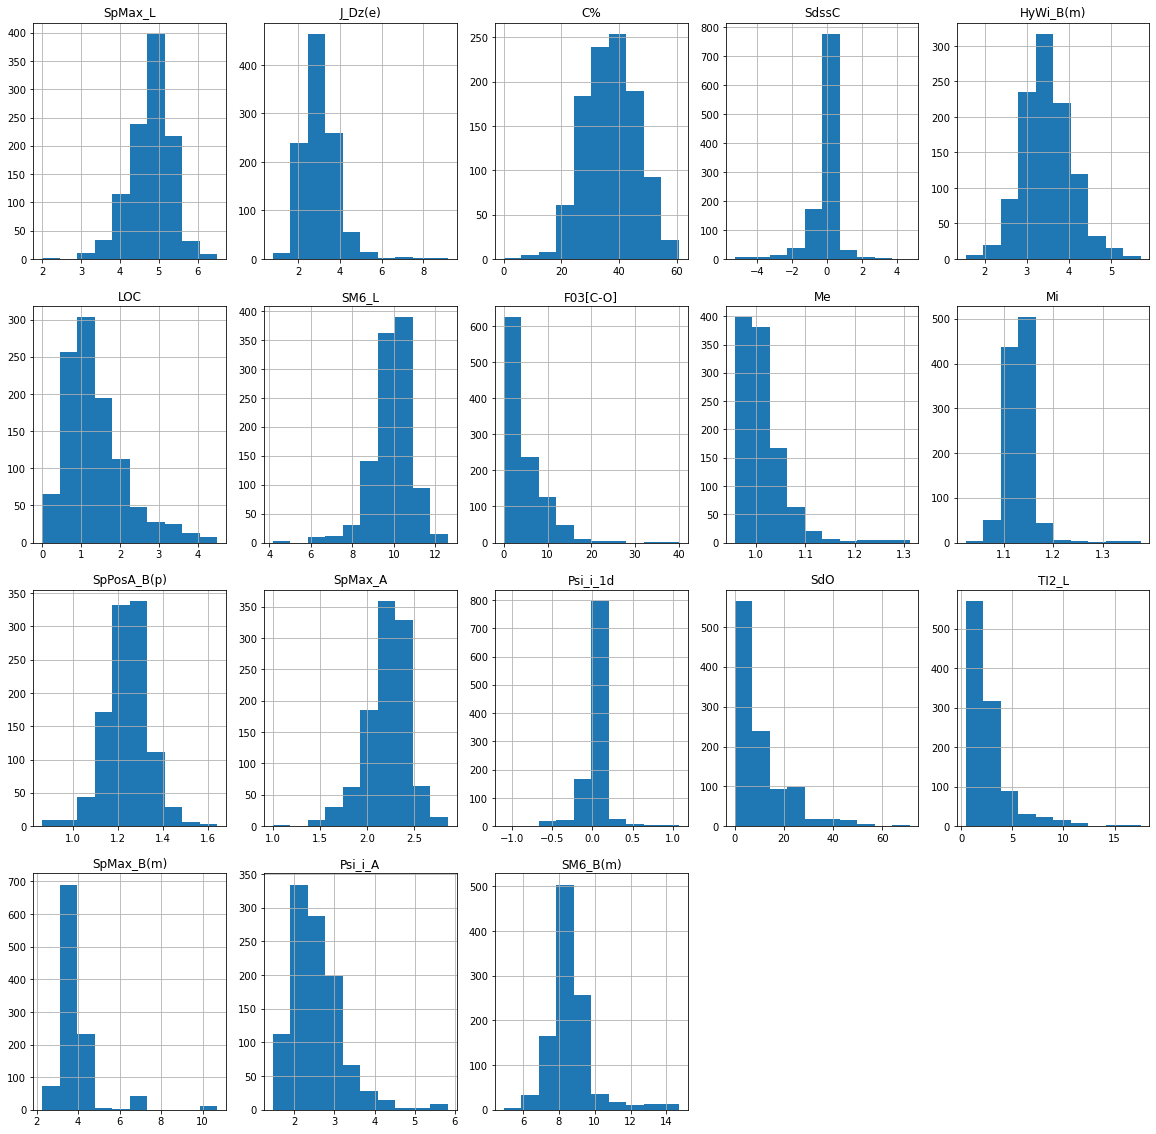

In [74]:
# histogramme des variables quantis
k = 1
plt.figure(1, figsize = (20, 20))
for i in keysquant :
    plt.subplot(4, 5, k,title=i)
    data[i].hist()
    k += 1
plt.show()

<Figure size 1440x1440 with 0 Axes>

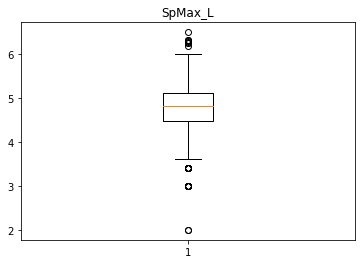

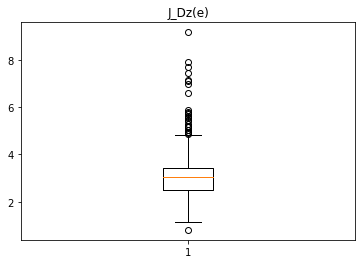

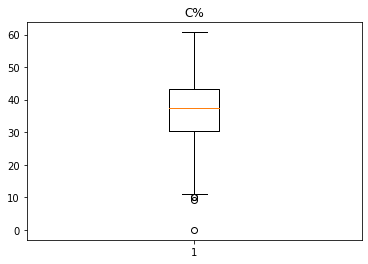

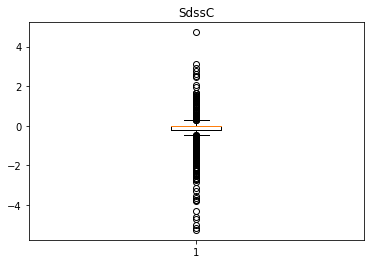

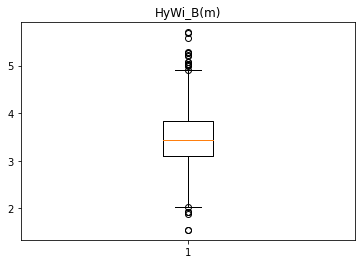

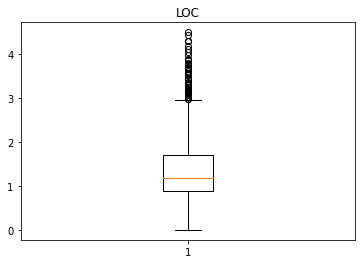

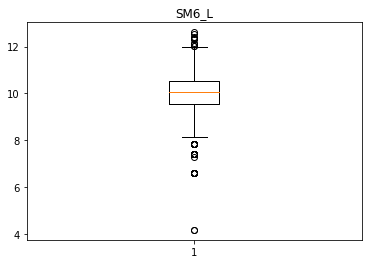

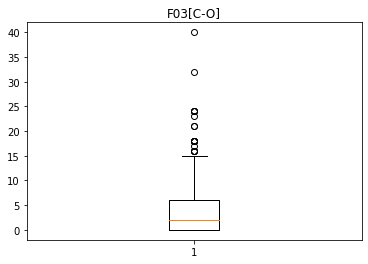

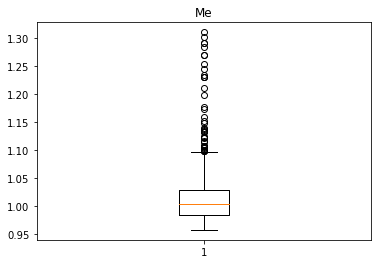

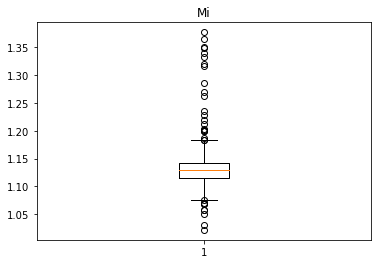

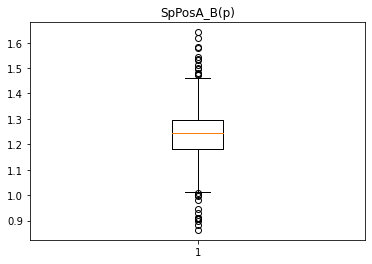

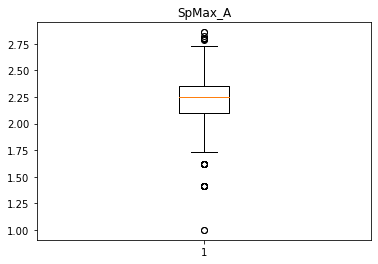

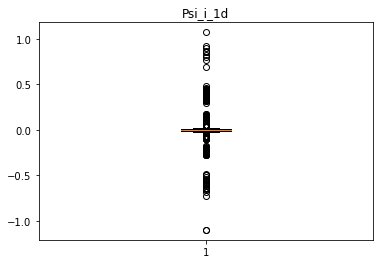

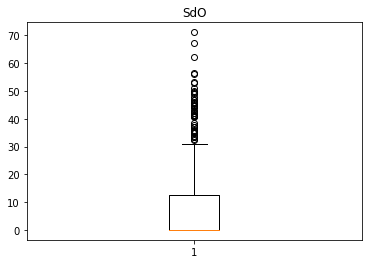

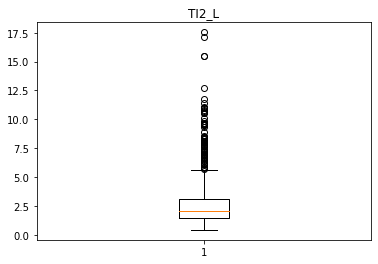

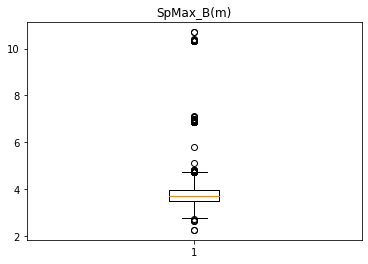

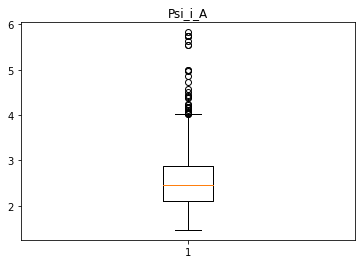

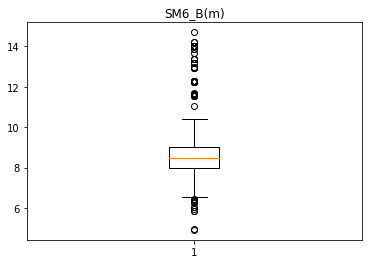

In [75]:
# boxplot des variables quantis
k = 1
plt.figure(1, figsize = (20, 20))
for i in keysquant:
    fig, ax = plt.subplots()
    ax.boxplot(data[i])
    plt.title(i)
    plt.show()
    k += 1
plt.show()

In [76]:
#print(np.sort(data["SpMax_B(m)"])[-60:])
print(data[keysqual[1]].shape)

(1055,)


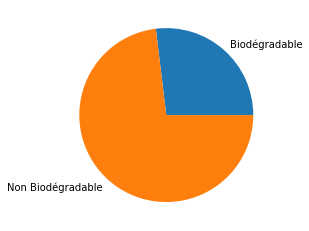

In [77]:
x = [sum(data['Y']), len(data) - sum(data['Y'])]
plt.pie(x, labels=['Biodégradable', 'Non Biodégradable'] )
plt.show()

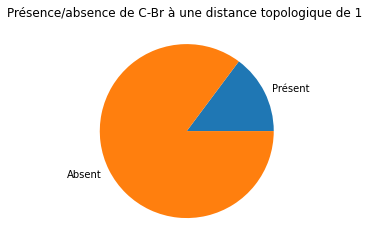

In [78]:
x = [sum(data[keysqual[1]]), len(data) - sum(data[keysqual[1]])]
plt.pie(x, labels=['Présent', 'Absent'] )
plt.title("Présence/absence de C-Br à une distance topologique de 1 ")
plt.show()


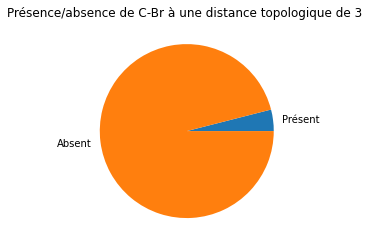

In [79]:
x = [sum(data[keysqual[0]]), len(data) - sum(data[keysqual[0]])]
plt.pie(x, labels=['Présent', 'Absent'] )
plt.title("Présence/absence de C-Br à une distance topologique de 3 ")
plt.show()

data = pd.read_csv("biodeg.csv", sep=" ")
x = []
label = []
for i in range(0, 45):
    if sum(data[keysqual[0]]==i)>0:
        x.append(sum(data[keysqual[0]]==i))
        label.append(str(i))

plt.pie(x, labels=label)
plt.title("Fréquence de C-O à une distance topologique de 3")
plt.show()

## Regroupement de modalité 

1       0
2       0
3       0
4       0
5       0
       ..
1051    0
1052    0
1053    0
1054    0
1055    0
Name: B01[C-Br], Length: 1055, dtype: int64


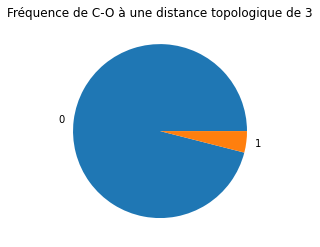

In [80]:
var = keysqual[0]
newdata = data
print(newdata[var])
for i in range(1,len(newdata[var])):
    if newdata[var][i] > 11:
        newdata[var][i] = 11
    if newdata[var][i] == 9 or newdata[var][i] == 10:
        newdata[var][i] = 9
    if newdata[var][i] == 5  or newdata[var][i] == 7:
        newdata[var][i] = 6
        
x = []
label = []
for i in range(0, 12):
    if sum(data[keysqual[0]]==i)>0:
        x.append(sum(data[keysqual[0]]==i))
        label.append(str(i))

plt.pie(x, labels=label)
plt.title("Fréquence de C-O à une distance topologique de 3")
plt.show()

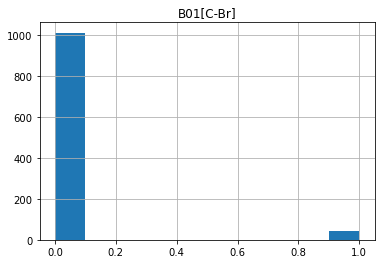

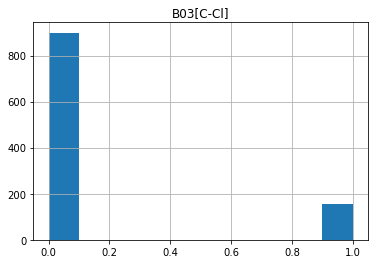

In [81]:
#mosaique des variables qualis
for i in keysqual:
    data[i].hist()
    plt.title(i)
    plt.show()



## Recherche de valeurs aberrantes

In [82]:
# SpMax_B(m)
print(np.sort([i for i in data['SpMax_B(m)'] if  i>10]))
print("\n")
indexSM = [i for i in range(1, len(data['SpMax_B(m)'])) if data['SpMax_B(m)'][i]>10]
indexSm = [i for i in range(1, len(data['SpMax_B(m)'])) if data['SpMax_B(m)'][i]>6 and data['SpMax_B(m)'][i]<10]
print(indexSm)
print("\n")
print(indexSM)
print("\n")
print(data['Y'][indexSm])
print("\n")
print(data['Y'][indexSM])

[10.319 10.319 10.323 10.323 10.323 10.329 10.349 10.355 10.428 10.692
 10.695]


[17, 218, 297, 317, 368, 380, 381, 385, 429, 430, 431, 435, 453, 455, 458, 473, 525, 528, 532, 567, 616, 620, 659, 669, 673, 682, 685, 721, 722, 724, 725, 726, 765, 809, 832, 833, 864, 920, 947, 948, 1026, 1039]


[294, 323, 373, 432, 456, 622, 623, 624, 664, 770, 933]


17      1
218     1
297     0
317     0
368     0
380     0
381     0
385     0
429     0
430     0
431     0
435     0
453     0
455     0
458     0
473     0
525     0
528     0
532     0
567     0
616     0
620     0
659     0
669     0
673     0
682     0
685     0
721     0
722     0
724     0
725     0
726     0
765     0
809     0
832     0
833     0
864     0
920     0
947     0
948     0
1026    0
1039    0
Name: Y, dtype: int64


294    0
323    0
373    0
432    0
456    0
622    0
623    0
624    0
664    0
770    0
933    0
Name: Y, dtype: int64


In [83]:
print(np.sort([i for i in data['Mi'] if  i>1.3]))
print("\n")
indexMi = [i for i in range(1, len(data['Mi'])) if data['Mi'][i]>1.3]
print(indexMi)
print("\n")
print(data['Y'][indexMi])

print([i for i in indexMi if i in indexSm])

[1.317 1.32  1.333 1.34  1.348 1.35  1.365 1.377]


[288, 289, 734, 910, 931, 971, 1029, 1037]


288     0
289     0
734     0
910     0
931     0
971     0
1029    0
1037    0
Name: Y, dtype: int64
[]


In [84]:
print(np.sort([i for i in data['SdO'] if  i>60]))
print("\n")
indexSdO = [i for i in range(1, len(data['SdO'])) if data['SdO'][i]>60]
print(indexSdO)
print("\n")
print(data['Y'][indexSdO])

print([i for i in indexSdO if i in indexMi])

[62.168 67.469 71.167]


[790, 1003, 1052]


790     0
1003    0
1052    0
Name: Y, dtype: int64
[]


## Multidimensionelle

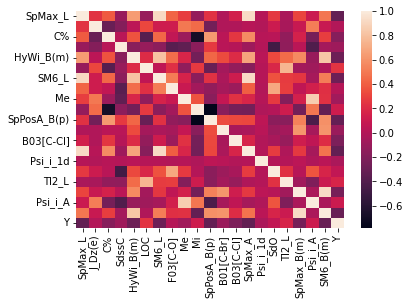

In [85]:
# correlation plot matrix des variables quantitatives
import seaborn as sn
corr_matrix = data.corr()
sn.heatmap(corr_matrix)
plt.show()

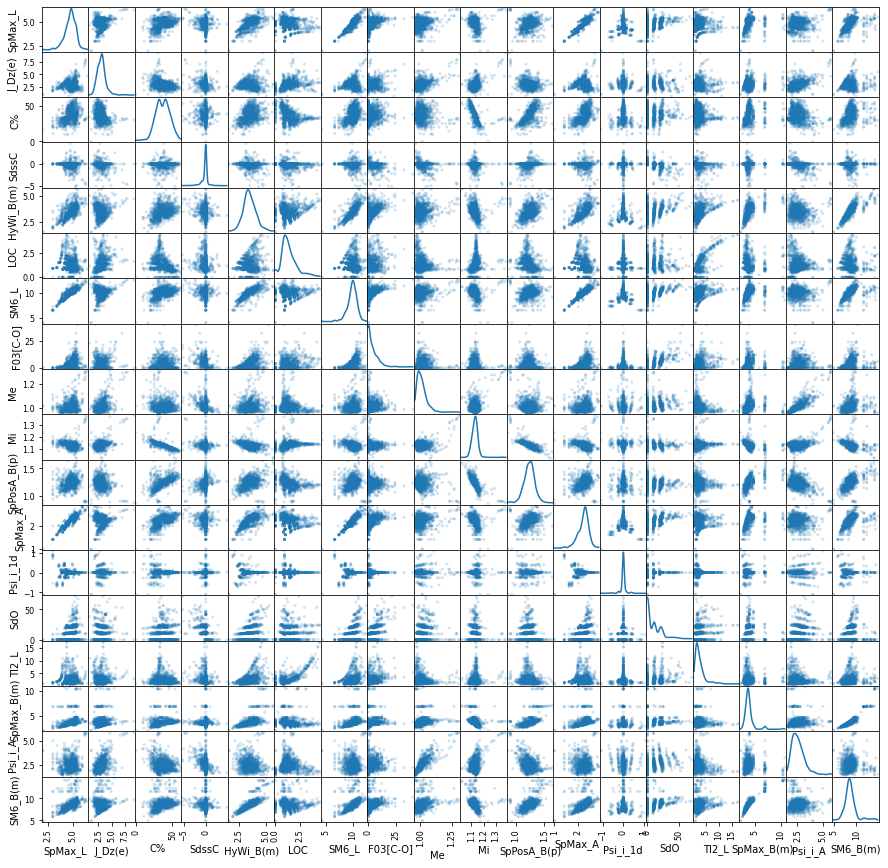

In [86]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix

scatter_matrix(data[keysquant], alpha=0.2, 
               figsize=(15, 15), diagonal='kde')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


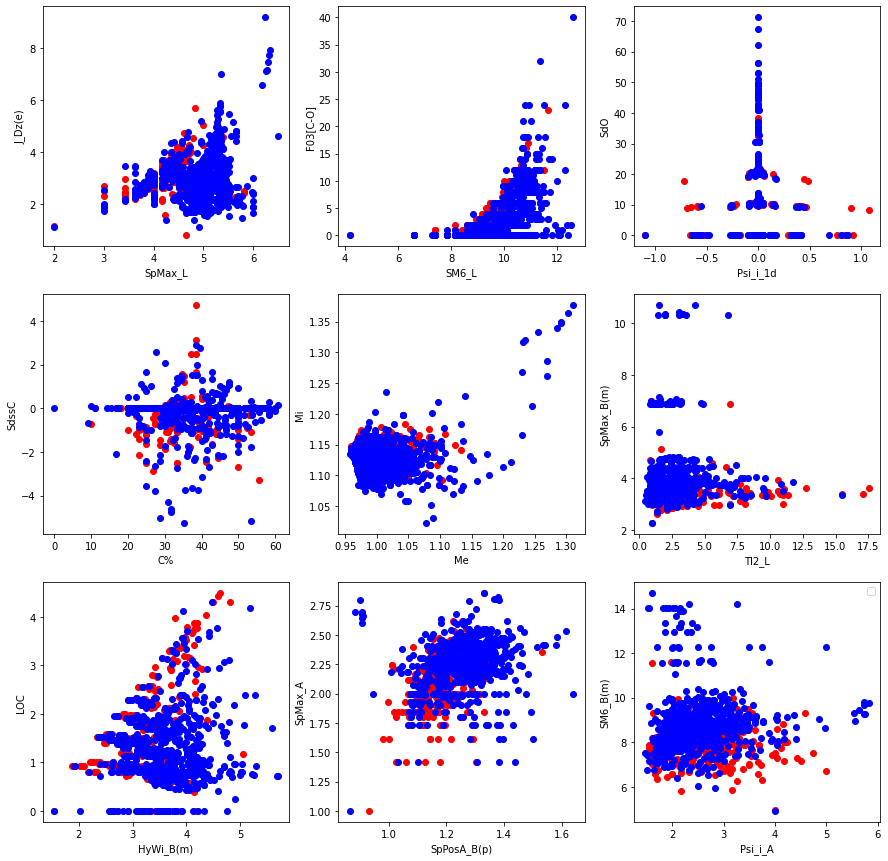

In [87]:
fig, axs = plt.subplots(3, 3)
fig.set_figheight(15)
fig.set_figwidth(15)

l = 0
m = 0

for var in range(0, len(keysquant)-1, 2):
    v1 = data[keysquant[var]]
    v2 = data[keysquant[var+1]]
    ax = axs[l, m]

    l+=1
    if l==3 : 
        l=0
        m+=1

    for i in range(1, len(v1)+1):
        
        color = "red" if data['Y'][i] else "blue"
        ax.plot(v1[i], v2[i], "o",color=color)
    
    ax.set(xlabel=keysquant[var], ylabel=keysquant[var+1])
    
plt.legend()
plt.show()

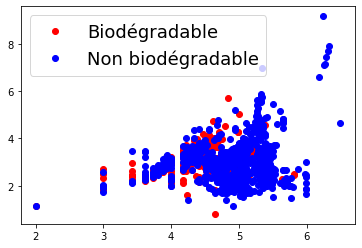

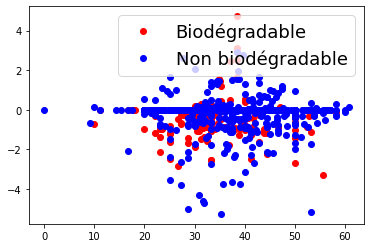

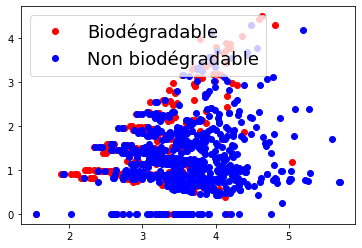

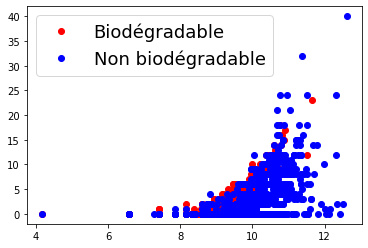

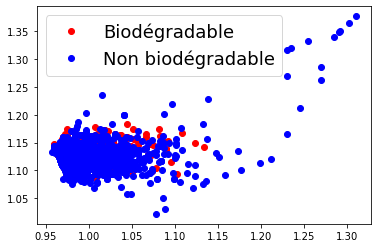

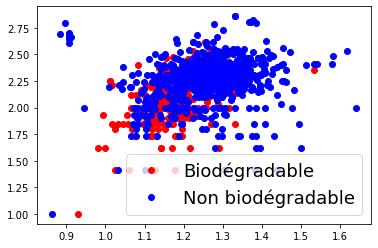

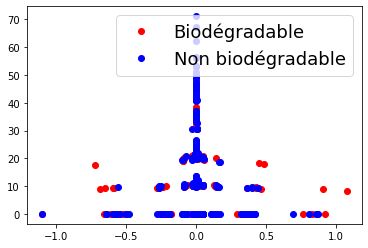

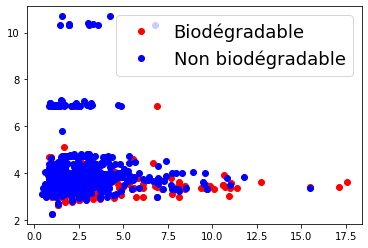

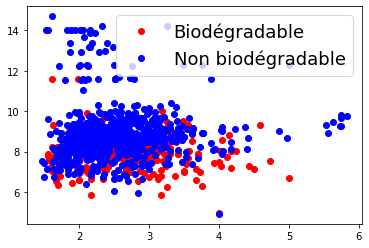

In [88]:
## Représentation des individus en composantes originelles
for var in range(0, len(keysquant)-1, 2):

    v1 = data[keysquant[var]]
    v2 = data[keysquant[var+1]]

    blueleg = False
    redleg = False

    plt.figure()
    for i in range(1, len(v1)+1):
        color = "red" if data['Y'][i] else "blue"

        if not blueleg and color=="blue":                                               #il écrit la légende sur le premier point
            plt.plot(v1[i], v2[i], "o",color=color, label="Non biodégradable")
            blueleg = True
        elif not redleg and color=="red":
            plt.plot(v1[i], v2[i], "o",color=color, label="Biodégradable")
            redleg = True


        else:
            plt.plot(v1[i], v2[i], "o",color=color)
        
    plt.legend(prop={'size': 18})
plt.show()

### Lien Variables Qualitatives et Paramètres à prédire

In [89]:
biodeg = data['Y']

# Variables binaires
param = data[keysqual[0]]

param = data[keysqual[1]]








## ACP 

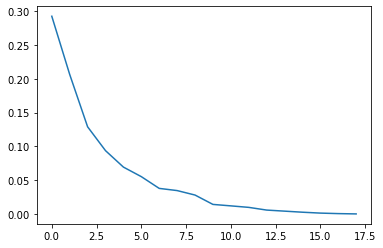

In [90]:
X = scale(data[keysquant])
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

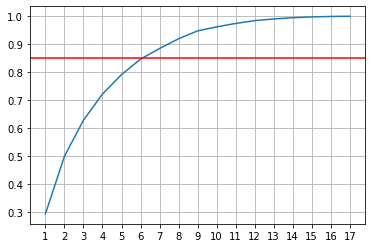

In [91]:
plt.figure()

fcc = np.zeros(len(pca.explained_variance_ratio_)-1)
x = np.arange(1, len(pca.explained_variance_ratio_))

for i in x:
    fcc[i-1] = sum(pca.explained_variance_ratio_[:i])

plt.plot(x, fcc)
plt.axhline(y=0.85, color='r', linestyle='-')
plt.grid()
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.show()

numvarACP = 6

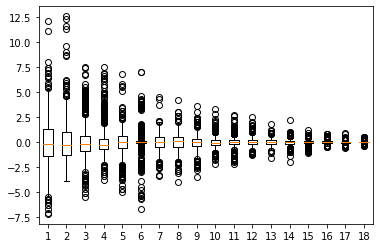

In [92]:
#boxplot des ACP
plt.boxplot(C[:,0:20])
plt.show()

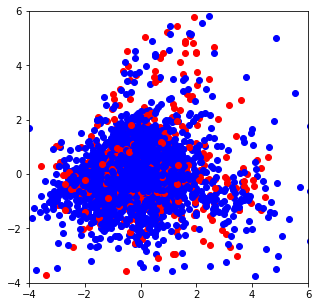

In [93]:
## Représentation des individus en ACP
plt.figure(figsize=(5,5))
for var in range(1, 16, 2):
    for i, j, nom in zip(C[:,var], C[:,var + 1], data['Y']):
        color = "red" if nom  else "blue"
        plt.plot(i, j, "o",color=color)
plt.axis((-4,6,-4,6))  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


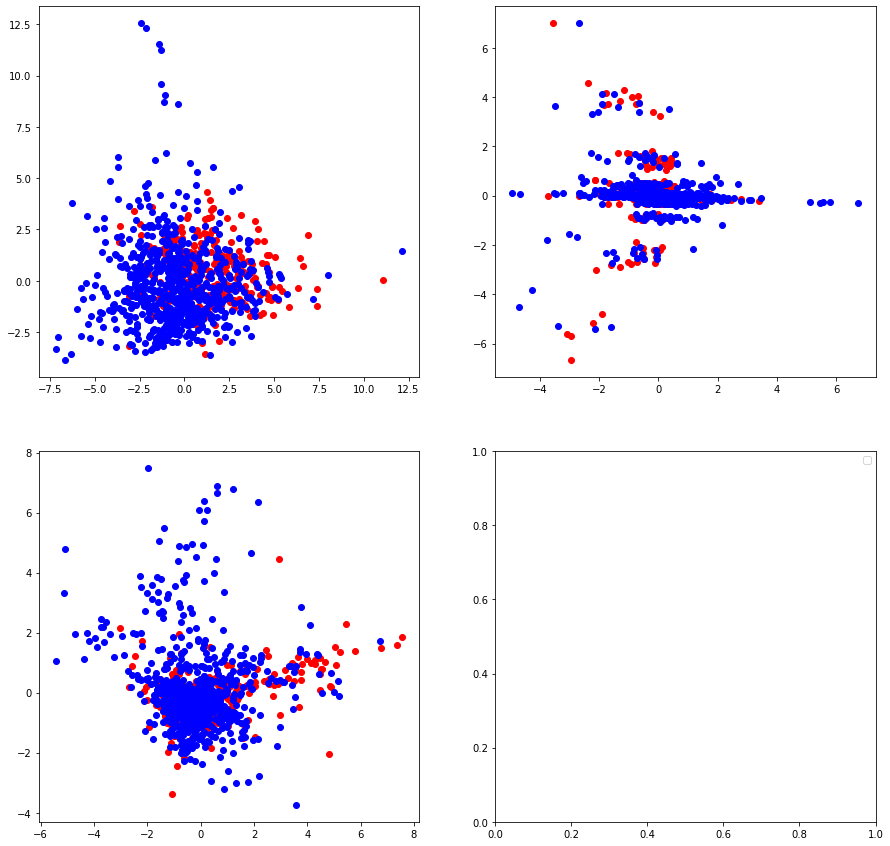

In [94]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

l = 0
m = 0

for var in range(0, numvarACP, 2):
    v1 = C[:,var]
    v2 = C[:,var + 1]
    ax = axs[l, m]

    l+=1
    if l==2 : 
        l=0
        m+=1

    for i in range(len(v1)):
        
        color = "red" if data['Y'][i+1] else "blue"
        ax.plot(v1[i], v2[i], "o",color=color)
    
    
plt.legend()
plt.show()

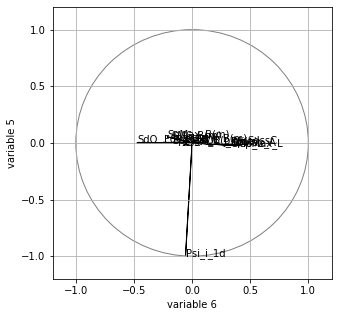

In [95]:
## coordonnées et représentation des variables
coord1=pca.components_[4]*np.sqrt(pca.explained_variance_[4])
coord2=pca.components_[5]*np.sqrt(pca.explained_variance_[5])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data[keysquant].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
ax.grid()
plt.ylabel("variable 5")
plt.xlabel("variable 6")
plt.show()

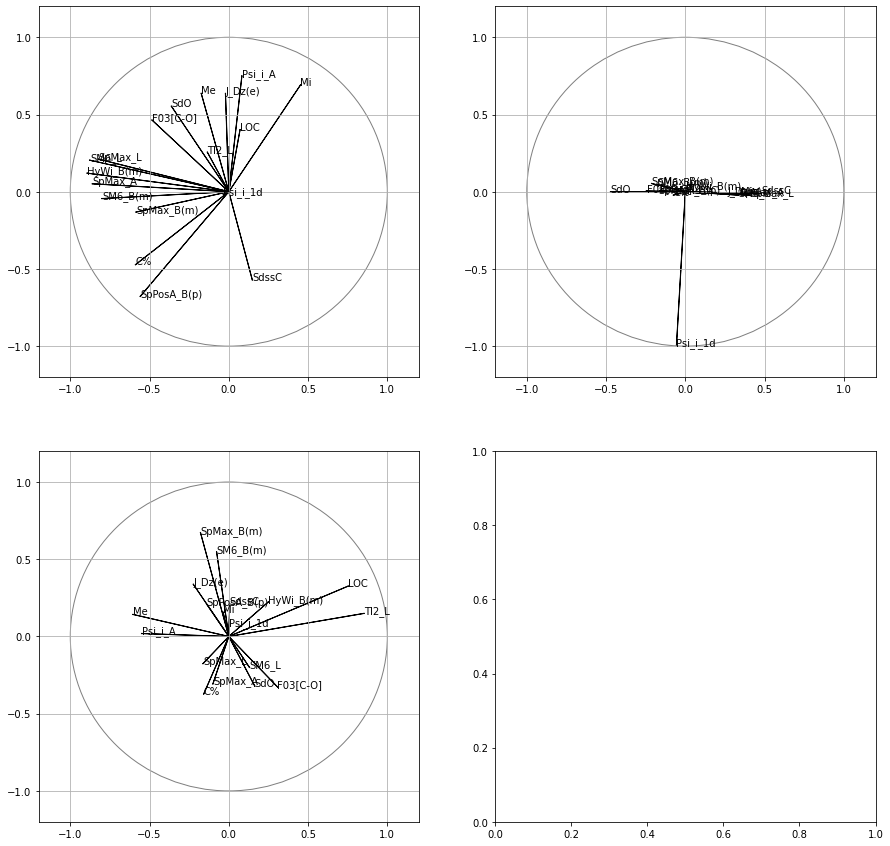

In [96]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

l = 0
m = 0



for var in range(0, numvarACP, 2):
    ## coordonnées et représentation des variables
    coord1=pca.components_[var]*np.sqrt(pca.explained_variance_[var])
    coord2=pca.components_[var+1]*np.sqrt(pca.explained_variance_[var+1])
    
    ax = axs[l, m]

    l+=1
    if l==2 : 
        l=0
        m+=1

    for i, j, nom in zip(coord1,coord2, data[keysquant].columns):
        ax.text(i, j, nom)
        ax.arrow(0,0,i,j,color='black')
    ax.axis((-1.2,1.2,-1.2,1.2))
    # cercle
    c=plt.Circle((0,0), radius=1, color='gray', fill=False)
    ax.add_patch(c)
    ax.grid()


plt.show()

## Kmeans

In [97]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=4)
clust.fit(X)
classe=clust.labels_
print(classe)

[1 1 1 ... 3 0 0]


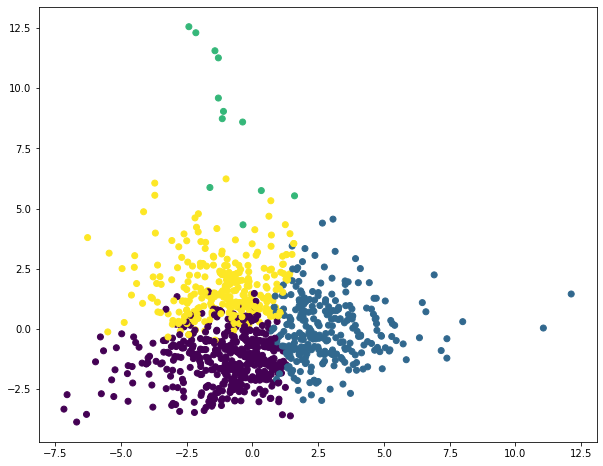

In [98]:
## Repésentation des individus dans les coordonnées de l'acp.
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe) 
plt.show()

In [99]:
# variable à expliquer binaire
Yb=data["Y"].map(lambda x: int(x))

In [100]:
# Variables explicatives
dataDum=pd.get_dummies(data[keysqual]) #transforme les qualitatives en indicatrices je crois
print(dataDum)
#del ozoneDum["JOUR_0"]
dfC=pd.concat([dataDum,data[keysquant]],axis=1)
dfC.head()

      B01[C-Br]  B03[C-Cl]
1             0          0
2             0          0
3             0          0
4             0          0
5             0          0
...         ...        ...
1051          0          0
1052          0          0
1053          0          0
1054          0          1
1055          0          1

[1055 rows x 2 columns]


,B01[C-Br],B03[C-Cl],SpMax_L,J_Dz(e),C%,SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,SpPosA_B(p),SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B(m),Psi_i_A,SM6_B(m)
1,0,0,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0,0.960,1.142,1.201,1.932,0.011,0.000,4.489,2.949,1.591,7.253
2,0,0,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,1,0.989,1.144,1.104,2.214,-0.204,0.000,1.542,3.315,1.967,7.257
3,0,0,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,0,1.009,1.152,1.092,1.942,-0.008,0.000,4.891,3.076,2.417,7.601
4,0,0,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,0,1.108,1.167,1.024,1.414,1.073,8.361,1.333,3.046,5.000,6.690
5,0,0,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,2,1.004,1.147,1.137,1.985,-0.002,10.348,5.588,3.351,2.405,8.003


In [101]:
#Séparation entre trainet test
from sklearn.model_selection import train_test_split  
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=200,random_state=11)

## K plus proche voisin

In [102]:
from sklearn.neighbors import KNeighborsClassifier
# Optimisation de k
# grille de valeurs
param_grid=[{"n_neighbors":list(range(1,15))}]
knn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
knnOpt=knn.fit(X_train, Yb_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
knnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-knnOpt.best_score_,knnOpt.best_params_))

Meilleur score = 0.205848, Meilleur paramètre = {'n_neighbors': 10}


In [103]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-knnOpt.score(X_test,Yb_test)

0.235

In [104]:
# Prévision de l'échantillon test
y_chap = knnOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
print(table)

Y        0   1
row_0         
0      135  34
1       13  18


## LASSO (Je pense pas qu'on fasse la partie non logit car notre variable est binaire pas continue)

In [105]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(X_train,Yb_train)
prev=regLasso.predict(X_test)
print("MSE=",mean_squared_error(Yb_test,prev))
print("R2=",r2_score(Yb_test,prev))

# Commmenter les scores et "Quelle est la valeur par défaut du paramètre de pénalisation Lasso ?"

MSE= 0.1925287096884511
R2= -0.0006689692746935094


In [106]:
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Yb_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

# Quelle validation croisée est exécutée ?

Meilleur R2 = 0.141984, Meilleur paramètre = {'alpha': 0.05}


In [107]:
prev=regLassOpt.predict(X_test)
print("MSE=",mean_squared_error(prev,Yb_test))
print("R2=",r2_score(Yb_test,prev))

MSE= 0.1600850059720428
R2= 0.16795734941765705


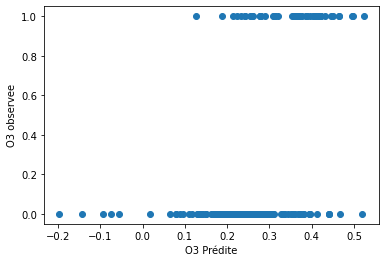

In [108]:
plt.plot(prev,Yb_test,"o")
plt.xlabel(u"O3 Prédite")
plt.ylabel("O3 observee")
plt.show()

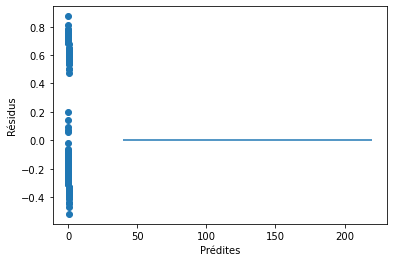

In [109]:
plt.plot(prev,Yb_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,220)
plt.show()

## logit

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
#sans pénalisation
logit = LogisticRegression(C=1e9,solver="liblinear")
logitNonPen = logit.fit(X_train, Yb_train) 
y_chap = logitNonPen.predict(X_test)
table=pd.crosstab(y_chap,Yb_test)
print(table)
print(logitNonPen.coef_)

Y        0   1
row_0         
0      136  24
1       12  28
[[ 6.77901475e-02 -8.40380630e-01 -2.03082320e+00 -4.89637643e-01
   8.28147523e-02  2.94608397e-01 -6.55558044e+00  1.41371073e+00
   3.12576335e+00  1.25025094e-01  9.57457814e+00 -6.24394467e+01
  -1.40898308e+01 -5.76776919e+00 -5.83755242e-01  1.76021369e-02
   1.87829697e-01  7.51765459e-01  2.70611939e-01  1.97571112e-01]]


In [112]:
#énorme pénalisation
logit = LogisticRegression(C=1e-15,solver="liblinear")
logitTropPen = logit.fit(X_train, Yb_train)  #Prédit que tout est faux tous le temps
y_chap = logitTropPen.predict(X_test)
table=pd.crosstab(y_chap,Yb_test)
print(table)
print(logitTropPen.coef_)

Y        0   1
row_0         
0      148  52
[[-1.7500000e-14 -5.6500000e-14 -1.0006000e-12 -5.9397015e-13
  -7.9155500e-12  1.5137500e-14 -7.4815050e-13 -1.9501400e-13
  -2.0452245e-12 -6.8000000e-13 -1.9911200e-13 -2.1967500e-13
  -2.5435450e-13 -4.6134500e-13 -1.4625000e-15 -1.4494190e-12
  -4.1681400e-13 -8.5731750e-13 -4.6921100e-13 -1.8375550e-12]]


In [113]:
# Optimisation du paramètre de pénalisation Lasso
# grille de valeurs
param=[{"C":[ 2, 3, 4, 5, 6, 7, 8]}]
logit_lasso = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOptLasso=logit_lasso.fit(X_train, Yb_train)  # GridSearchCV est lui-même un estimateur

# paramètre optimal
logitOptLasso.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOptLasso.best_score_,logitOptLasso.best_params_))

# Optimisation du paramètre de pénalisation Ridge
# grille de valeurs
param=[{"C":[ 2, 3, 4, 5, 6, 7, 8]}]
logit_ridge = GridSearchCV(LogisticRegression(penalty="l2",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOptRidge=logit_ridge.fit(X_train, Yb_train)  # GridSearchCV est lui-même un estimateur

# paramètre optimal
logitOptRidge.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOptRidge.best_score_,logitOptRidge.best_params_))

Meilleur score = 0.194152, Meilleur paramètre = {'C': 6}
Meilleur score = 0.192982, Meilleur paramètre = {'C': 7}


In [114]:
# erreur sur l'échantillon test
print(1-logitOptLasso.score(X_test, Yb_test))

# erreur sur l'échantillon test
print(1-logitOptRidge.score(X_test, Yb_test))

0.16500000000000004
0.16500000000000004


In [115]:
# Prévision Optimisé Lasso
y_chap = logitOptLasso.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
print(table)

# Prévision Optimisé Ridge
y_chap = logitOptRidge.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
print(table)


Y        0   1
row_0         
0      138  23
1       10  29
Y        0   1
row_0         
0      138  23
1       10  29


In [116]:
# Coefficients Lasso
logitLasso=LogisticRegression(penalty="l1",C=logitOptLasso.best_params_['C'],
                              solver="liblinear")
logitCoefLasso=logitLasso.fit(X_train,Yb_train).coef_
print(logitCoefLasso[0])

# Coefficients Ridge
logitRidge=LogisticRegression(penalty="l2",C=logitOptRidge.best_params_['C'],
                              solver="liblinear")
logitCoefRidge=logitRidge.fit(X_train,Yb_train).coef_
print(logitCoefRidge[0])

print(abs(logitCoefLasso[0] - logitCoefRidge[0]))

[ 2.19251489e-02 -6.29103816e-01 -2.18691283e+00 -4.48209218e-01
  1.37388757e-01  1.40046555e-01 -6.66282846e+00  1.34227151e+00
  2.53951290e+00  1.74926081e-01  2.45005423e+00  0.00000000e+00
 -4.81819749e+00 -2.48438452e+00 -6.03261246e-01  5.92134727e-03
  2.94210821e-01  8.15425047e-01  7.52069766e-01  1.83673141e-01]
[ 5.57000452e-01 -6.81166700e-01 -2.21353080e+00 -4.06303715e-01
  1.18050348e-01  1.34937423e-01 -5.66905300e+00  1.27916612e+00
  2.35561921e+00  1.68137955e-01  1.52989059e+00 -3.82912585e-01
 -1.98747830e+00 -1.70591176e+00 -6.08337975e-01  4.57223385e-03
  2.91397396e-01  1.15935811e+00  1.01316930e+00 -5.22769713e-01]
[5.35075303e-01 5.20628834e-02 2.66179746e-02 4.19055034e-02
 1.93384093e-02 5.10913244e-03 9.93775462e-01 6.31053906e-02
 1.83893692e-01 6.78812551e-03 9.20163635e-01 3.82912585e-01
 2.83071919e+00 7.78472756e-01 5.07672817e-03 1.34911342e-03
 2.81342505e-03 3.43933064e-01 2.61099530e-01 7.06442854e-01]


In [117]:
coefLasso = pd.Series(logitCoefLasso[0], index = X_train.columns)
print("Lasso conserve " + str(sum(coefLasso != 0)) + 
      " variables et en supprime " +  str(sum(coefLasso == 0)))

coefRidge = pd.Series(logitCoefRidge[0], index = X_train.columns)
print("Ridge conserve " + str(sum(coefRidge != 0)) + 
      " variables et en supprime " +  str(sum(coefRidge == 0)))

Lasso conserve 19 variables et en supprime 1
Ridge conserve 20 variables et en supprime 0


Mi             0.000000
SdO            0.005921
B01[C-Br]      0.021925
C%             0.137389
SdssC          0.140047
F03[C-O]       0.174926
SM6_B(m)       0.183673
TI2_L          0.294211
J_Dz(e)        0.448209
Psi_i_1d       0.603261
B03[C-Cl]      0.629104
Psi_i_A        0.752070
SpMax_B(m)     0.815425
LOC            1.342272
SpMax_L        2.186913
Me             2.450054
SpMax_A        2.484385
SM6_L          2.539513
SpPosA_B(p)    4.818197
HyWi_B(m)      6.662828
dtype: float64


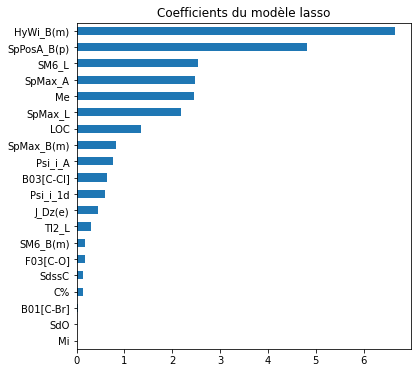

In [148]:
coefLasso = abs(coefLasso)
imp_coef = coefLasso.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

print(imp_coef)

Text(0.5, 1.0, 'Coefficients du modèle lasso')

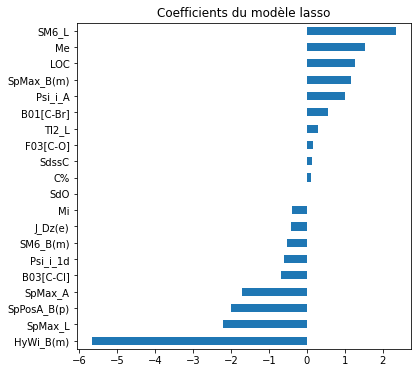

In [119]:
imp_coef = coefRidge.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

Text(0.5, 1.0, 'Ecarts sur leq coefficients des deux modèles')

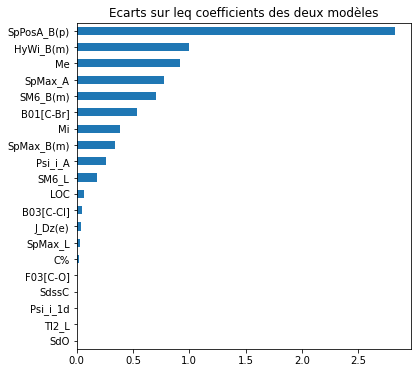

In [120]:
imp_coef = (abs(coefRidge - coefLasso)).sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Ecarts sur leq coefficients des deux modèles")

**Question** Interprétez l'effet des variables retenues.

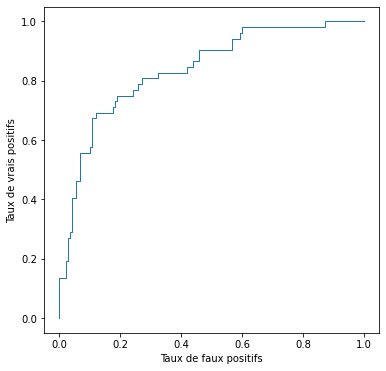

In [121]:
from sklearn.metrics import roc_curve
probas_ = LogisticRegression(penalty="l1", solver="liblinear",
                    C=logitOptLasso.best_params_['C']).fit(X_train, Yb_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Yb_test, probas_[:,1])
plt.plot(fpr, tpr, lw=1)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.show()

c:\Users\pagou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pagou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pagou\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


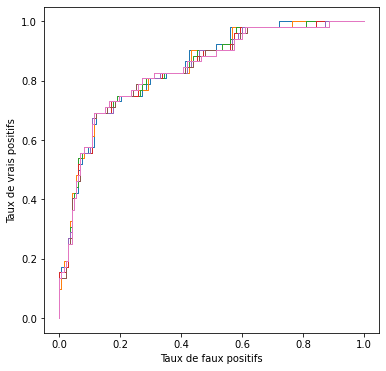

In [122]:
from sklearn.metrics import roc_curve
plt.figure()
for c in param[0]['C']:
    probas_ = LogisticRegression(penalty="l1", solver="liblinear",
                        C=c).fit(X_train, Yb_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Yb_test, probas_[:,1])
    plt.plot(fpr, tpr, lw=1)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.show()

#Aucun C ne semble sortir du lot

**Question** Commentez la courbe ROC à propos du choix de la valeur seuil.

Ici la pénalisation est lambda * norme (l1 ou l2) des coefficients donc plus lambda est grand plus on va diminuer en valeur absolu les coefficients, on diminue l'impact des variables.
C correspond à 1/lambda

## SVM

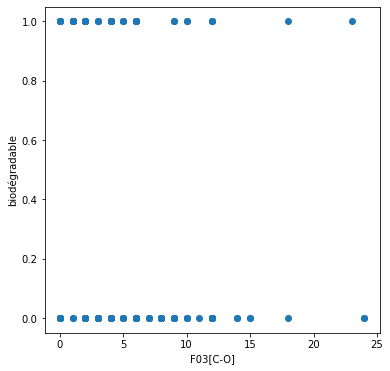

In [123]:
plt.plot(X_test["F03[C-O]"],Yb_test,"o")
plt.xlabel("F03[C-O]")
plt.ylabel("biodégradable")
plt.show()

In [124]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler  


# La SVM nécessite une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

param=[{"C":[0.6,0.8,1,1.4, 1.6, 1.8, 2, 2.2, 2.4]}]
kernels =["linear", "poly", "rbf", "sigmoid"]
for kernel in kernels:
    svm= GridSearchCV(SVC(kernel=kernel),param,cv=10,n_jobs=-1)
    svmOpt=svm.fit(Xr_train, Yb_train)

    # paramètre optimal
    print(kernel + " : \n")
    print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

    y_pred = svmOpt.predict(Xr_test)
    table=pd.crosstab(y_pred,Yb_test)
    print(table)

    vals = table.values
    print("précision : ", (vals[0, 0] + vals[1, 1])/sum(sum(vals)))
    print("\n")

linear : 

Meilleur score = 0.184911, Meilleur paramètre = {'C': 2.2}
Y        0   1
row_0         
0      137  21
1       11  31
précision :  0.84


poly : 

Meilleur score = 0.238605, Meilleur paramètre = {'C': 2.2}
Y        0   1
row_0         
0      141  40
1        7  12
précision :  0.765


rbf : 

Meilleur score = 0.179042, Meilleur paramètre = {'C': 1.6}
Y        0   1
row_0         
0      134  23
1       14  29
précision :  0.815


sigmoid : 

Meilleur score = 0.274911, Meilleur paramètre = {'C': 0.6}
Y        0   1
row_0         
0      129  27
1       19  25
précision :  0.77




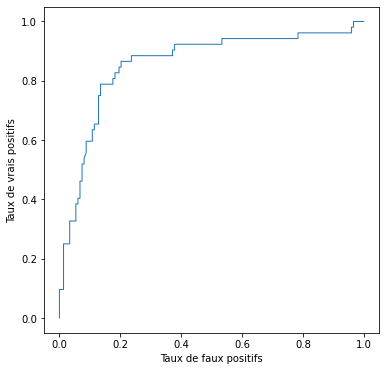

In [125]:
#Courbe ROC, je sais pas si c'est une bonne idée

probas_ = SVC(C=svmOpt.best_params_['C'], probability=True).fit(Xr_train, Yb_train).predict_proba(Xr_test)
fpr, tpr, thresholds = roc_curve(Yb_test, probas_[:,1])
plt.plot(fpr, tpr, lw=1)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.show()

### Essai de différent kernel


linear case :  
 Y        0   1
row_0         
0      137  21
1       11  31

poly case :  
 Y        0   1
row_0         
0      141  42
1        7  10

sigmoid case :  
 Y        0   1
row_0         
0      135  39
1       13  13

rbf case :  
 Y        0   1
row_0         
0      134  23
1       14  29


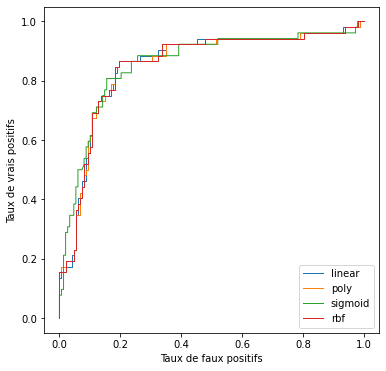

In [126]:
kernel = ['linear', 'poly', 'sigmoid', 'rbf']
for k in kernel:
    param=[{"C":[0.4,0.5,0.6,0.8,1,1.4, 1.6, 1.8, 2], "kernel": [k]}]
    svm= GridSearchCV(SVC(),param,cv=10,n_jobs=-1)
    svmOpt=svm.fit(Xr_train, Yb_train)

    y_pred = svmOpt.predict(Xr_test)
    table=pd.crosstab(y_pred,Yb_test)
    print("\n" + k + " case :  \n",table)
    probas_ = SVC(C=svmOpt.best_params_['C'], probability=True).fit(Xr_train, Yb_train).predict_proba(Xr_test)
    fpr, tpr, thresholds = roc_curve(Yb_test, probas_[:,1])
    plt.plot(fpr, tpr, lw=1, label=k)
    
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend()
plt.show()

Expliquer a quoi correspond le C

## CART (Arbre binaire)

In [127]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.203543, Meilleur paramètre = {'max_depth': 5}


In [128]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
print(table)

Y        0   1
row_0         
0      124  20
1       24  32


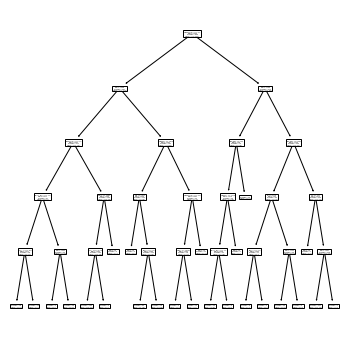

In [129]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(X_train,Yb_train)
plot_tree(treeG,feature_names=dfC.columns.tolist());
plt.show()

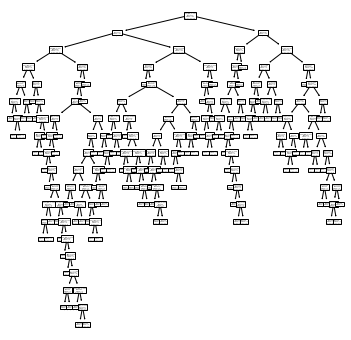

In [130]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
treeG=DecisionTreeClassifier(max_depth=100)
treeG.fit(X_train,Yb_train)
plot_tree(treeG,feature_names=dfC.columns.tolist());
plt.show()

## Random forest 

In [131]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train,Yb_train)
print(1-rfFit.oob_score_)

0.19298245614035092


In [132]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(X_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.177778, Meilleur paramètre = {'max_features': 7}


B01[C-Br] 0.0003644225287507398
B03[C-Cl] 0.006064239758490218
Psi_i_1d 0.03734065897736528
TI2_L 0.039100927639087436
Me 0.042084616000409684
F03[C-O] 0.04326905341945547
SdO 0.04588883490734807
Mi 0.04603086314333875
C% 0.04791581829136517
SM6_L 0.04862226639270176
J_Dz(e) 0.04899504521696365
SdssC 0.049749009077624286
LOC 0.05009693376008824
Psi_i_A 0.056792028795309465
SpMax_A 0.06363590604696526
HyWi_B(m) 0.06438561583892448
SpPosA_B(p) 0.07442231368133713
SpMax_L 0.07709289501009053
SM6_B(m) 0.07716725038375
SpMax_B(m) 0.08098130113063437


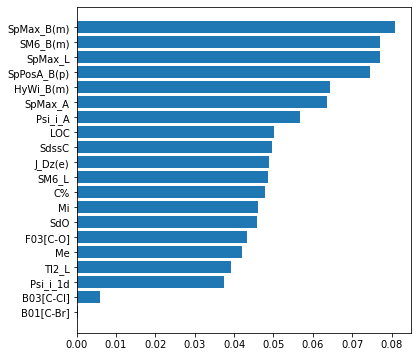

In [157]:
rf= RandomForestClassifier(n_estimators=100,max_features=2)
rfFit=rf.fit(X_train, Yb_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
for f in np.flip(range(X_train.shape[1])):
    print(dfC.columns[indices[f]], importances[indices[f]])

    plt.barh(dfC.columns[indices[f]], importances[indices[f]], color='C0')

plt.show()

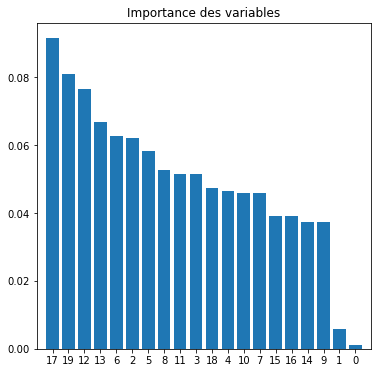

In [134]:
# Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [135]:
# prévision de l'échantillon test
y_chap = rfOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
print(table)

Y        0   1
row_0         
0      132  22
1       16  30


## Neural Network

In [136]:
from sklearn.neural_network import MLPClassifier
param_grid=[{"hidden_layer_sizes":list([(7,),(8,), (9,), (10,)])}]
nnet= GridSearchCV(MLPClassifier(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(X_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.209521, Meilleur paramètre = {'hidden_layer_sizes': (7,)}


c:\Users\pagou\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [137]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(X_test,Yb_test)

0.22499999999999998

In [138]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
print(table)

Y        0   1
row_0         
0      137  34
1       11  18


## Boosting

In [139]:
from sklearn.ensemble import AdaBoostClassifier
tps0=time.perf_counter()
param=[{"n_estimators":[200, 250, 300, 350, 400, 450]}]
Ada= GridSearchCV(AdaBoostClassifier(),param,cv=10)
AdaOpt=Ada.fit(X_train, Yb_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps boosting = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                        1. - AdaOpt.best_score_,AdaOpt.best_params_))

Temps boosting = 28.590546, Meilleur taux = 0.198851, Meilleur paramètre = {'n_estimators': 200}


In [140]:
# erreur de prévision sur le test
1-AdaOpt.score(X_test,Yb_test)

# prévision de l'échantillon test
y_chap =AdaOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
print(table)

Y        0   1
row_0         
0      129  26
1       19  26


In [141]:
from sklearn.ensemble import GradientBoostingClassifier
tps0=time.perf_counter()
param=[{"n_estimators":[300, 350, 400, 450]}]
gbm= GridSearchCV(GradientBoostingClassifier(),param,cv=10)
gbmOpt=gbm.fit(X_train, Yb_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps boosting = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                        1. - gbmOpt.best_score_,gbmOpt.best_params_))

Temps boosting = 29.279143, Meilleur taux = 0.198851, Meilleur paramètre = {'n_estimators': 350}


In [142]:
# erreur de prévision sur le test
1-gbmOpt.score(X_test,Yb_test)

0.18999999999999995

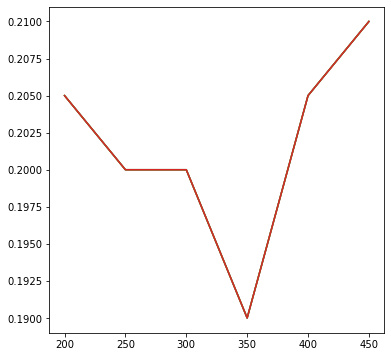

In [143]:
error =[]
x = np.arange(200, 451, 50)
for i in x:
    Boosting = GradientBoostingClassifier(n_estimators=i)
    gbmOpt=gbm.fit(X_train, Yb_train)
    # prévision de l'échantillon test
    y_chap = gbmOpt.predict(X_test)
    error.append(sum(np.absolute(y_chap - Yb_test ))/len(y_chap)) 

plt.figure()
for i in range(200, 400, 50):
    plt.plot(x, error)
plt.show()

In [144]:
# prévision de l'échantillon test
y_chap = gbmOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
print(table)

Y        0   1
row_0         
0      125  19
1       23  33


# Comparaison des Modèles

In [145]:
from sklearn.metrics import roc_curve
listMethod=[["RF",rfOpt],["NN",nnetOpt],["Tree",treeOpt],["K-nn",knnOpt],["Logit",logitOpt], ["Logit Non Pénalisé",logitNonOpt], ["GradientBoosting", gbmOpt], ["AdaBoosting", AdaOpt]]

NameError: name 'logitOpt' is not defined

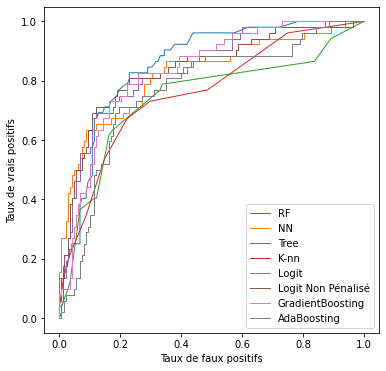

In [ ]:
for method in enumerate(listMethod):
    probas_ = method[1][1].fit(X_train, Yb_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Yb_test, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

## Comparaison avec validation croisée Monte Carlo

In [ ]:
from sklearn.utils import check_random_state
import time
check_random_state(13)
tps0=time.perf_counter()
# définition des estimateurs
adaboost = AdaBoostClassifier()
gradboost = GradientBoostingClassifier()
logit= LogisticRegression(penalty="l1",solver="liblinear")
knn  = KNeighborsClassifier()
tree = DecisionTreeClassifier()
nnet = MLPClassifier(max_iter=600)
rf   = RandomForestClassifier(n_estimators=100)
svm  = SVC()
# Nombre d'itérations
B=1 # pour exécuter après le test, mettre plutôt B=30   # ---------------------------------> !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# définition des grilles de paramètres
listMethGrid=[[svm,{"C":[0.4,0.5,0.6,0.8,1,1.4]}],
    [adaboost, {"n_estimators":[250, 300, 350, 400]}],
    [gradboost, {"n_estimators":[250, 300, 350, 400]}],
    [rf,{"max_features":list(range(2,10,2))}],
    [nnet,{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}],
    [tree,{"max_depth":list(range(2,10))}],
    [knn,{"n_neighbors":list(range(1,15))}],
    [logit,{"C":[0.5,1,5,10,12,15,30]}]]
# Initialisation à 0 des erreurs pour chaque méthode (colonne) et chaque itération (ligne)
arrayErreur=np.empty((B,8))
for i in range(B):   # itérations sur B échantillons test
    # extraction apprentissage et test
    X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=200)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # Meme transformation sur le test
    X_test = scaler.transform(X_test)
    # optimisation de chaque méthode et calcul de l'erreur sur le test
    for j,(method, grid_list) in enumerate(listMethGrid):
        methodGrid=GridSearchCV(method,grid_list,cv=10,n_jobs=-1).fit(X_train, Yb_train)
        methodOpt = methodGrid.best_estimator_
        methFit=methodOpt.fit(X_train, Yb_train)
        arrayErreur[i,j]=1-methFit.score(X_test,Yb_test)
tps1=time.perf_counter()
print("Temps execution en mn :",(tps1 - tps0))
dataframeErreur=pd.DataFrame(arrayErreur,columns=["SVM","AdaBoost", "GradBoost", "RF","NN","Tree","Knn","Logit"])    

c:\Users\pagou\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pagou\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Temps execution en mn : 12.203465400001733


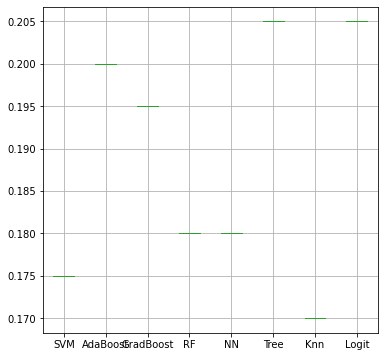

In [ ]:
# Distribution des erreurs de prévisions
# Les SVM présentant des erreurs atypiques sont laissés de côté.
dataframeErreur[["SVM","AdaBoost", "GradBoost", "RF","NN","Tree","Knn","Logit"]].boxplot(return_type='dict')
plt.show()